In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../data/raw"))

['.keep', 'master.csv']


In [4]:
data=pd.read_csv('../data/raw/master.csv')

In [5]:
print(data)

                        country  year     sex          age  suicides_no  \
0                       Albania  1987    male  15-24 years         21.0   
1                       Albania  1987    male  35-54 years         16.0   
2                       Albania  1987  female  15-24 years         14.0   
3                       Albania  1987    male    75+ years          1.0   
4                       Albania  1987    male  25-34 years          9.0   
...                         ...   ...     ...          ...          ...   
31751                   Ukraine  2017  female    75+ years        256.0   
31752            United Kingdom  2017  female    75+ years        104.0   
31753  United States of America  2017  female    75+ years        501.0   
31754                   Uruguay  2017  female    75+ years         14.0   
31755                Uzbekistan  2017  female    75+ years          3.0   

       population  suicides/100k pop                  country-year  \
0          312900           6

In [6]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.000000,30556.000000,3.175600e+04,31756.000000,12300.000000,31756.000000
mean,2003.395390,237.136242,7.217454e+06,11.716668,0.793666,17588.954606
std,9.760604,867.956107,5.799323e+07,21.590926,0.097480,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,0.377790,251.000000
25%,1996.000000,3.000000,1.288210e+05,0.370000,0.727000,3765.000000
50%,2004.000000,25.000000,5.468325e+05,4.285000,0.800457,10062.000000
75%,2011.000000,132.000000,2.908763e+06,14.560000,0.874000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,0.975114,126352.000000


In [12]:
#so,change the names of the column. Because there may be problems for future analysis.
data=data.rename(columns={'sex':'Gender','suicides/100k pop':'Suicides100kPop','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney'})

In [13]:
data.isnull().values.any()

True

In [14]:
data.isnull().sum()

country                   0
year                      0
Gender                    0
age                       0
suicides_no            1200
population                0
Suicides100kPop           0
country-year              0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
generation                0
dtype: int64

In [18]:
#As you can see, most of the HDIForYear value is empty. That's why I want this value deleted.
# data=data.drop(['HDIForYear'],axis=1)
data.isnull().sum()

country                  0
year                     0
Gender                   0
age                      0
suicides_no           1200
population               0
Suicides100kPop          0
country-year             0
GdpForYearMoney          0
GdpPerCapitalMoney       0
generation               0
dtype: int64


Let's see how the number of suicides varies depending on gender and age

In [19]:
sex_suicide = data[['Gender', 'suicides_no', 'age']].groupby(['Gender', 'age']).sum().reset_index()

In [20]:
genders = go.Pie(labels=sex_suicide['Gender'], values=sex_suicide['suicides_no'])
male = go.Pie(labels=sex_suicide['age'][sex_suicide['Gender']=='male'], 
              values=sex_suicide['suicides_no'][sex_suicide['Gender']=='male'])
female = go.Pie(labels=sex_suicide['age'][sex_suicide['Gender']=='female'], 
              values=sex_suicide['suicides_no'][sex_suicide['Gender']=='female'])

fig = go.Figure()

fig.add_trace(genders)
fig.add_trace(male)
fig.add_trace(female)

fig.data[0].visible = True
fig.data[1].visible = False
fig.data[2].visible = False


fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            buttons=[
                dict(
                    label="All",
                    method="update",
                    args=[{"visible": [True, False, False]}]
                ),
                dict(
                    label="Male",
                    method="update",
                    args=[{"visible": [False, True, False]}]
                ),
                dict(
                    label="Female",
                    method="update",
                    args=[{"visible": [False, False, True]}]
                )
            ],
            direction="down",
            pad={"r": 1, "t": 1},
            showactive=True,
            x=0,
            xanchor="left",
            y=1.2,
            yanchor="top"
    )],
    title={
        'text': "Suicide number by gender and age",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(marker_colors=['pink','lightblue'])

fig.show()

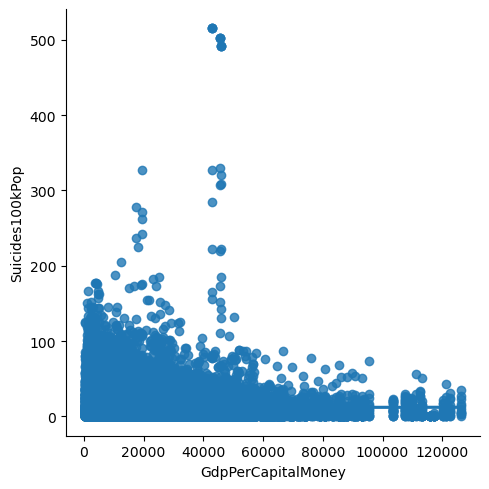

In [24]:
sns.lmplot(x="GdpPerCapitalMoney", y="Suicides100kPop", data=data)
plt.show()